## Statistics for DAGs $ A \rightarrow B \rightarrow C \rightarrow D \rightarrow E \rightarrow F $ with all possible confounder edges / version 0.2

### Imports

In [45]:
import json
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import random

import warnings
warnings.filterwarnings("ignore")

### import data / output of DAGitty on ABCDE DAGs

In [46]:
with open('data_out_6N', 'r') as f:
  data = json.load(f)

with open('dags_out_6N', 'r') as f:
  dags = json.load(f)

with open('monoton_dags_6N', 'r') as f:
  monoton_dags = json.load(f)
  
with open('monoton_data_6N', 'r') as f:
  monoton_data = json.load(f)

# print(f'{data[0] = }')

### counting the number of times edge $ i \in \{ A, B, C, D, E \} $ is being identified

Number of DAGs studied: 32768

Number of times edge i was identified: 

A: sum_num_A_idfied = 0
B: sum_num_B_idfied = 25346
C: sum_num_C_idfied = 29015
D: sum_num_D_idfied = 30090
E: sum_num_E_idfied = 30471
F: sum_num_F_idfied = 30618
Maximum number an edge was identified in any DAG: 1.0
Minimum number an edge was identified in any DAG: 0.0


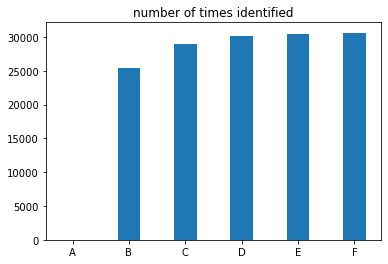

In [47]:
print(f'Number of DAGs studied: {len(dags)}\n')

print('Number of times edge i was identified: \n')
####### AAAAAAAAAAAAAA
num_A_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_A_identified[i] = date.count('"A":')

sum_num_A_idfied = int(np.sum(num_A_identified))
print(f'A: {sum_num_A_idfied = }')
#######

####### BBBBBBBBBBBBBB
num_B_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_B_identified[i] = date.count('"B":')

sum_num_B_idfied = int(np.sum(num_B_identified))
print(f'B: {sum_num_B_idfied = }')
######

###### CCCCCCCCCCCCCCC
num_C_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_C_identified[i] = date.count('"C":')

sum_num_C_idfied = int(np.sum(num_C_identified))
print(f'C: {sum_num_C_idfied = }')
######

###### DDDDDDDDDDDDDDD
num_D_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_D_identified[i] = date.count('"D":')
    
sum_num_D_idfied = int(np.sum(num_D_identified))
print(f'D: {sum_num_D_idfied = }')

######

###### EEEEEEEEEEEEEEE
num_E_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_E_identified[i] = date.count('"E":')

sum_num_E_idfied = int(np.sum(num_E_identified))
print(f'E: {sum_num_E_idfied = }')

######

###### FFFFFFFFFFFFFF
num_F_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_F_identified[i] = date.count('"F":')

sum_num_F_idfied = int(np.sum(num_F_identified))
print(f'F: {sum_num_F_idfied = }')

######
# # max: 
# print(f'{max(num_A_identified) = }')
# print(f'{max(num_B_identified) = }')
# print(f'{max(num_C_identified) = }')
# print(f'{max(num_D_identified) = }')
# print(f'{max(num_E_identified) = }')
# print(f'{max(num_F_identified) = }')
# # min: 
# print(f'{min(num_A_identified) = }')
# print(f'{min(num_B_identified) = }')
# print(f'{min(num_C_identified) = }')
# print(f'{min(num_D_identified) = }')
# print(f'{min(num_E_identified) = }')
# print(f'{min(num_F_identified) = }')
#######

# check that each edge is maximally identified once per DAG: 
max_times_idfied = max([max(num_A_identified), max(num_B_identified), max(num_C_identified), max(num_D_identified), max(num_E_identified), max(num_F_identified)])
print(f'Maximum number an edge was identified in any DAG: {max_times_idfied}')

# check Minimum per DAG: 
min_times_idfied = min([min(num_A_identified), min(num_B_identified), min(num_C_identified), min(num_D_identified), min(num_E_identified), min(num_F_identified)])
print(f'Minimum number an edge was identified in any DAG: {min_times_idfied}')

figx1 = plt.figure()
axx1 = figx1.add_subplot()
# number of times edge X was identified: 
axx1.bar([1, 2, 3, 4, 5, 6], [sum_num_A_idfied, sum_num_B_idfied, sum_num_C_idfied, sum_num_D_idfied, sum_num_E_idfied, sum_num_F_idfied], width=0.4)
axx1.set_xticklabels(['', 'A', 'B', 'C', 'D', 'E', 'F'])
axx1.set_title('number of times identified')
# plt.savefig('DAGitty_Statisti_X_1_Edge_NumIdentified.svg')
plt.show()

### how many times i edges were identified, (i $ \in \{0, 1, 3, 4, 5 \} $)

There are 21755 DAGs in which 5 edges could be identified. 
There are 6827 DAGs in which 4 edges could be identified. 
There are 2282 DAGs in which 3 edges could be identified. 
There are 1015 DAGs in which 2 edges could be identified. 
There are 581 DAGs in which 1 edge could be identified. 
There are 308 DAGs in which 0 edges could be identified. 


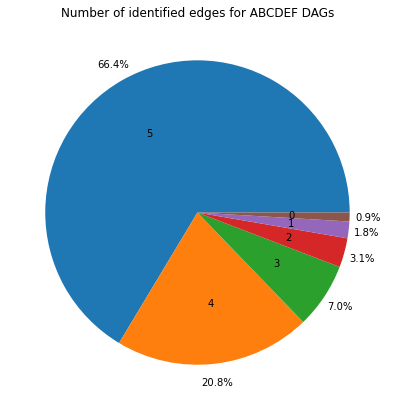

In [48]:
# for each data point (dag) add up the numbers of times identified of the different edges: 
num_identified = num_A_identified + num_B_identified + num_C_identified + num_D_identified + num_E_identified + num_F_identified
# print(f'{len(num_identified), max(num_identified), min(num_identified) = }')

## 5 edges: 
boole_five = np.isin(num_identified, [5])
print(f'There are {np.sum(boole_five)} DAGs in which 5 edges could be identified. ')
percentage_5 = np.sum(boole_five)/len(data)
# print(f'In {percentage_5} % of the graphs four edges where identified.')

## 4 edges: 
boole_four = np.isin(num_identified, [4])
print(f'There are {np.sum(boole_four)} DAGs in which 4 edges could be identified. ')
percentage_4 = np.sum(boole_four)/len(data)
# print(f'In {percentage_4} % of the graphs four edges where identified.')

## 3 edges: 
boole_three = np.isin(num_identified, [3])
percentage_3 = np.sum(boole_three)/len(data)
print(f'There are {np.sum(boole_three)} DAGs in which 3 edges could be identified. ')

## two edges: 
boole_two = np.isin(num_identified, [2])
percentage_2 = np.sum(boole_two)/len(data)
print(f'There are {np.sum(boole_two)} DAGs in which 2 edges could be identified. ')

## one edge: 
boole_one = np.isin(num_identified, [1])
percentage_1 = np.sum(boole_one)/len(data)
print(f'There are {np.sum(boole_one)} DAGs in which 1 edge could be identified. ')

# print(f'{(np.sum(boole_one) + np.sum(boole_two) + np.sum(boole_three))/len(data) = }')
boole_some = np.isin(num_identified, [1, 2, 3, 4])
# print(f'{np.sum(boole_some) = }')
# print(f'In {np.sum(boole_some)/len(data)} % of the graphs some but not all (four) edges where identified.')

## no edge: 
boole_none = np.isin(num_identified, [0])
percentage_0 = np.sum(boole_none)/len(data)
print(f'There are {np.sum(boole_none)} DAGs in which 0 edges could be identified. ')
# print(f'{np.sum(boole_none) = }')
# print(f'In {np.sum(boole_none)/len(data)} % of the graphs none of the edges where identified.')
# check percentages: 
# print(f'check percentage: {(np.sum(boole_none) + np.sum(boole_some) + np.sum(boole_five))/len(data) = }')


figx2 = plt.figure(figsize=(7,7))
axx2 = figx2.add_subplot()
# how many edges were identified how often: 
labels = '5', '4', '3', '2', '1', '0'
sizes = [percentage_5*100, percentage_4*100, percentage_3*100, percentage_2*100, percentage_1*100, percentage_0*100]
axx2.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=1.12, labeldistance=.6)
axx2.set_title('Number of identified edges for ABCDEF DAGs')
# plt.savefig('DAGitty_Statisti_X_1_HowOftenIdentified_ABCDEF.svg')
plt.show()

### which methods were used to identify these edges? 

Each DAG uses "instrument" maximal 5 times.
Each DAG uses "propagate" maximal 5 times.
Each DAG uses "missingCycles" maximal 1 times.
int(sum_all_methods) = 145734
Percentage of edges identified: 88.9%


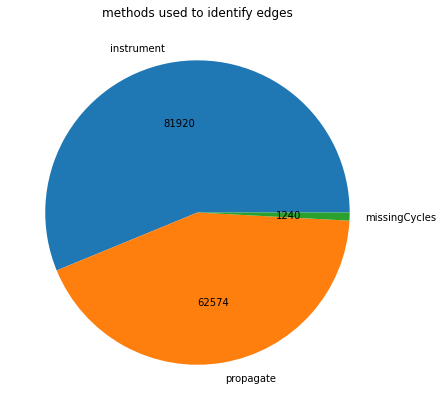

In [49]:
####### instrument
num_instrument = np.zeros(len(data))
for i, date in enumerate(data): 
    num_instrument[i] = date.count('"instrument"')
sum_num_instrument =  np.sum(num_instrument)
print(f'Each DAG uses "instrument" maximal {int(np.max(num_instrument))} times.')
####### instrument 

####### propagate
num_propagate = np.zeros(len(data))
for i, date in enumerate(data): 
    num_propagate[i] = date.count('"propagate"')
sum_num_propagate =  np.sum(num_propagate)
print(f'Each DAG uses "propagate" maximal {int(np.max(num_propagate))} times.')
####### propagate 

####### missingCycles
num_miscycles = np.zeros(len(data))
for i, date in enumerate(data): 
    num_miscycles[i] = date.count("missingCycles")

# print(f'{np.sum([num_miscycles>1]) = }')
print(f'Each DAG uses "missingCycles" maximal {int(np.max(num_miscycles))} times.')
sum_num_missingCycles =  np.sum(num_miscycles)
# print(f'{sum_num_missingCycles = }')
####### missingCycles


# which methods where used when identifying: 
sum_all_methods = sum_num_instrument + sum_num_propagate + sum_num_missingCycles
print(f'{int(sum_all_methods) = }')
print(f'Percentage of edges identified: {int(sum_all_methods)/(len(data)*5)*100:.3}%')

figx3 = plt.figure(figsize=(7, 7))
axx3 = figx3.add_subplot()

labels = 'instrument', 'propagate', 'missingCycles'
sizes = [sum_num_instrument, sum_num_propagate, sum_num_missingCycles]
axx3.pie(sizes, labels=labels, autopct= lambda x: round(x*sum_all_methods/100))
axx3.set_title('methods used to identify edges')
# plt.savefig('DAGitty_Statisti_X_1_Which_Methods.svg')
plt.show()

### DAGs which use missingCycles to identify edges and for which $ \exists A \leftrightarrow i $, $ i \in \{ B, C, D, E, F \} $, which is NOT part of the DAG: 



DAGs that are missing at least one confounder edge A<->i for i in {B, C, D, E, F} and use "missingCycles" to identify edges: 
(These are 524 DAGs from the total of 32768 DAGs and from the 1240 DAGs that use "missingCycles".)



xample = 8
For example:
 data[idxDOI[xample]] = '{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"C":[{"fastp":[[[[-1,8,1,13,1,17,1],[1,8,1,14,1,16,1],[-1,9,1,12,1,17,1],[1,9,1,13,1,14,1],[1,10,1,12,1,16,1],[-1,10,1,13,2]],[[-1]],[[-2,8,1,9,1,17,1],[2,8,1,10,1,16,1],[-2,9,1,10,1,13,1],[2,9,2,14,1]],[],[[-2,8,1,9,1,12,1,13,1,17,2],[2,8,1,9,1,12,1,14,1,16,1,17,1],[2,8,1,9,1,13,1,14,2,16,1],[-2,8,1,9,1,13,2,14,1,17,1],[2,8,1,10,1,12,1,13,1,16,1,17,1],[-2,8,1,10,1,12,1,14,1,16,2],[-2,8,1,10,1,13,2,14,1,16,1],[2,8,1,10,1,13,3,17,1],[-2,8,2,13,1,14,1,16,1,17,1],[1,8,2,13,2,17,2],[1,8,2,14,2,16,2],[6,9,1,10,1,12,1,13,1,14,1,16,1],[-2,9,1,10,1,12,1,13,2,17,1],[-2,9,1,10,1,12,2,16,1,17,1],[-2,9,1,10,1,13,3,14,1],[2,9,2,12,1,13,1,14,1

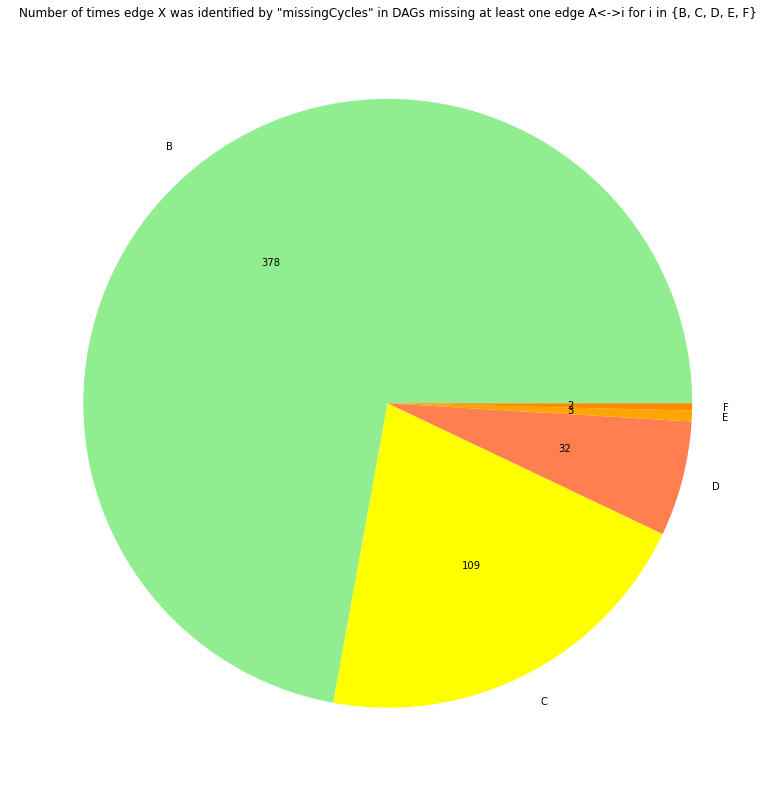

In [50]:
# wie sehen die Graphen aus, die missingCycles verwendet haben? :

# print(f'{num_miscycles.shape = }')
# np.nonzero returns the indizes of the elements that are nonzero: 
cycles_used_idcs = np.nonzero(num_miscycles)[0]
# print(f'{len(cycles_used_idcs), cycles_used_idcs = }')


###########
idxDOI = []  # indizes of DAGs Of Interest (DAGs without all edges A<->i for i = B, C, D, E, F that use missingCycles...)
for idx in cycles_used_idcs: 
    dag = np.array(dags)[idx]
    dagsplt = dag.split(' ')
    if not all([ x in dagsplt for x in ['A<->F', 'A<->E', 'A<->D', 'A<->C', 'A<->B']]): idxDOI.append(idx)
############


# print(f'{idxDOI = }')
boolean_DOI_in_dags = np.zeros(len(dags))  # a.k.a bool_notall_conf_miscycles oder so? 
boolean_DOI_in_dags[idxDOI] = 1

# # test: 
# print(f'{np.all(np.where(boolean_DOI_in_dags)[0] == idxDOI) = }')
# print(f'{len(boolean_DOI_in_dags), np.sum(boolean_DOI_in_dags), boolean_DOI_in_dags = }')

print('\n\nDAGs that are missing at least one confounder edge A<->i for i in {B, C, D, E, F} and use "missingCycles" to identify edges: ')

# how often missingCycles were used: 
boole_dags_w_mcycle = [num_miscycles > 0]
# print(f'{boole_dags_w_mcycle = }')


print(f'(These are {len(idxDOI)} DAGs from the total of {len(dags)} DAGs and from the {np.sum(boole_dags_w_mcycle)} DAGs that use "missingCycles".)\n')

# DOI = np.array(dags)[idxDOI]
# print(DOI)
print('\n')


xample = np.random.randint(0, len(idxDOI))
print(f'{xample = }')
print(f'For example:\n {data[idxDOI[xample]] = }\n') 

dags_w_mcycles = np.array(dags)[cycles_used_idcs]

print('\nFurther investigations: \n')
# check whether for these DAGs 4 of the edges A<->i for i in {B, C, D, E, F} are present and which edge was identified by "missingCycles": 
collect_data = []
confounders = ['A<->F', 'A<->E', 'A<->D', 'A<->C', 'A<->B']
for i in cycles_used_idcs:
    dag = np.array(dags)[i]
    dagsplt = dag.split(' ')
    which_confedges_in_dag = [ x in dagsplt for x in confounders]
    if not all(which_confedges_in_dag):  # check if not all confounder edges are in the dag_with_missingCycles)
        id_edges = []
        conf_edges = [ x for (x, b) in zip(confounders, which_confedges_in_dag) if b]  # translate boolean back to string_descriptor of confounder
        for edge in ['A', 'B', 'C', 'D', 'E', 'F']:  # 
            flag = False
            jsonload_data = json.loads(monoton_data[i][0])
            if edge in jsonload_data['results']:  # check if edge was identified, if yes: 
                jsonload_data_of_edge = jsonload_data['results'][f'{edge}']
                if 'missingCycles' in jsonload_data_of_edge[0]:  # and check if it was identified with missingCycles and if yes: collect data
                    flag = jsonload_data_of_edge[0]['missingCycles']
            if flag: 
                id_edges.append(edge)
          
        collect_data.append([i, np.sum(which_confedges_in_dag), conf_edges, id_edges])

print(f'{len(collect_data), collect_data = }')
which_id_edges = np.array([x[3] for x in collect_data]).flatten()
print(f'{which_id_edges.shape = }')

which_id_edges = list(which_id_edges)

number_of_A_ids = which_id_edges.count('A')
number_of_B_ids = which_id_edges.count('B')
number_of_C_ids = which_id_edges.count('C')
number_of_D_ids = which_id_edges.count('D')
number_of_E_ids = which_id_edges.count('E')
number_of_F_ids = which_id_edges.count('F')

sum_of_ids = np.sum((number_of_A_ids, number_of_B_ids, number_of_C_ids, number_of_D_ids, number_of_E_ids, number_of_F_ids))
# print(f'{sum_of_ids = }')

number_of_confounders = np.array([x[1] for x in collect_data]).flatten()
# print(f'{np.min(number_of_confounders), np.max(number_of_confounders) = }')

print(f'\nWe can see above that all of these DAGs have at least {np.min(number_of_confounders)} and maximally {np.max(number_of_confounders)} of the confounder edges A<->i for i in {{B, C, D, E, F}}. ')

edge_in_confounders = []
for item in collect_data: 
    for edge in item[3]: 
        edge_in_confounders.append(np.any(np.array([edge in confounder for confounder in item[2]])))

print(f'Also notice that for each edge X identified with "missingCycles" the confounder edge A<->X was part of the DAG: {np.all(np.array(edge_in_confounders))}') 


figy3 = plt.figure(figsize=(14, 14))
ax1= figy3.add_subplot()

labels = 'B', 'C', 'D', 'E', 'F'
sizes = [number_of_B_ids, number_of_C_ids, number_of_D_ids, number_of_E_ids, number_of_F_ids]

ax1.pie(sizes, labels=labels, colors=[ 'lightgreen', 'yellow', 'coral', 'orange', 'darkorange', 'lightblue'], autopct= lambda x: round(x*sum_of_ids/100))
ax1.set_title('Number of times edge X was identified by "missingCycles" in DAGs missing at least one edge A<->i for i in {B, C, D, E, F}')
plt.show()


## MONOTONIE 

In [51]:

monon_boolean = np.zeros(len(data))
monon_boolean = np.array(monon_boolean, dtype=bool)

# nodes_diff_all records for all subdags of a DAG in monoton_data/monoton_dags the difference of the identified edges: 
# (this is used later to determine which deletion of edges leads to non-monotonicity of the DAG (later in the case of a DAG for which all 5 edges were identified))
nodes_diff_all = []

for i, mon_date in enumerate(monoton_data): 
    ident_nodes = np.zeros(6)
    ident_base = np.zeros(6)
    ident_base[0] = mon_date[0].count('"A":')
    ident_base[1] = mon_date[0].count('"B":')
    ident_base[2] = mon_date[0].count('"C":')
    ident_base[3] = mon_date[0].count('"D":')
    ident_base[4] = mon_date[0].count('"E":')
    ident_base[5] = mon_date[0].count('"F":')
    check_list = []
    nodes_diff_leafs = []
    for date in mon_date[1:]: 
        ident_nodes[0] = date.count('"A":')
        ident_nodes[1] = date.count('"B":')
        ident_nodes[2] = date.count('"C":')
        ident_nodes[3] = date.count('"D":')
        ident_nodes[4] = date.count('"E":')
        ident_nodes[5] = date.count('"F":')
        nodes_diff_leafs.append(np.subtract(ident_nodes, ident_base))
        if np.all(np.subtract(ident_nodes, ident_base)!=-1): check_list.append(1)
        else: check_list.append(0)
    
    nodes_diff_all.append(nodes_diff_leafs)
    if np.all(np.array(check_list) == 1): monon_boolean[i]=True

# print(f'{monon_boolean = }')
# print(f'{np.sum(monon_boolean) = }\n')
print(f'There are {np.sum(monon_boolean, dtype=int)} monoton DAGs from the {len(data)} DAGs in total. \n')


## check: 
xample_vec = np.where(monon_boolean==True)[0]
# print(xample_vec)
xample = np.random.choice(xample_vec)

print('Example monoton DAG: ')
print(f'({xample = })\n')
print(f'{dags[xample]}\n')
print(f'...with results: \n{monoton_data[xample] = }\n')


# test: 
# print(f'{len(monoton_data), len(nodes_diff_all), nodes_diff_all = }')


There are 23215 monoton DAGs from the 32768 DAGs in total. 

Example monoton DAG: 
(xample = 23556)

dag { A->B->C->D->E->F E<->F D<->E C<->F C<->E A<->D }

...with results: 
monoton_data[xample] = ['{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"C":[{"fastp":[[[[1,3,1]],null,[[1,2,1]],null,null]],"instrument":"A"}],"D":[{"fastp":[[[[1,1,1,7,1,13,1],[-1,1,1,8,1,9,1],[1,2,1,3,1,9,1],[-1,2,2,13,1]],null,[[1,1,1,7,1,12,1],[-1,1,1,8,2],[1,2,1,3,1,8,1],[-1,2,2,12,1]],null,null]],"propagate":"C","propagatePath":["B","C"],"propagatedMissingCycles":[],"oldMissingCycles":[]}],"E":[{"fastp":[[[[1,5,1]],null,[[1,4,1]],null,null]],"instrument":"A"}],"F":[{"fastp":[[[[1,6,1]],null,[[1,5,1]],null,null]],"instrument":"A"}]}}', '{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"C":[{"fastp":[[[[1,3,1]],null,[[1,2,1]],null,null]],"instrument":"A"}],"D":[{"fastp":[[[[1,4,1]],null,[[1,3,1]],null,null]],"instrument":"A"}],"E":[{"fast

### DAGs that use missingCycles to identify edges... (Monotonie)

Are all the DAGs, that use "missingCycles" to identify edges, monoton? False
How many of the "missingCycles" DAGs are monoton? np.sum(boole_monoton_and_miscycles) = 634
Therefor 606 of them are not monoton. 

Are the monoton DAGs that use "missingCycles" and have 5 identifiable edges the same as the DAGs that do not have all       
confounder edges A<->i for i in {B, C, D, E, F} and use "missingCycles"? False
But the amount of both is the same? False
How many of them are the same? 206.0


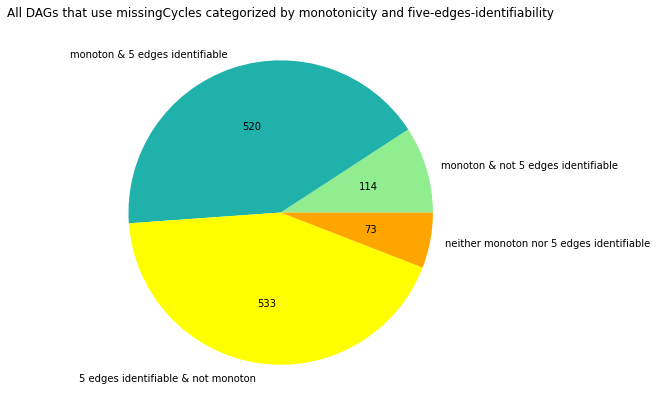

In [52]:
miscycles_idx = np.asarray(num_miscycles!=0).nonzero()[0]
# print(f'{miscycles_idx = }')

# ##################  'cycles_used_idcs' same as 'miscycles_idx'  ################## ? : 
# # cycles_used_idcs = np.nonzero(num_miscycles)[0]

# print(f'{np.all(cycles_used_idcs == miscycles_idx) = }') 
# ########################## : ? --> TRUE

boole_miscycles = np.where(num_miscycles!=0, 1, 0)
# print(f'{len(boole_miscycles), np.sum(boole_miscycles) = }')

# # test: 
# print(f'{np.all(miscycles_idx == np.where(boole_miscycles==1)[0]) = }')

boole_monoton_and_miscycles = boole_miscycles * monon_boolean
# print(f'{np.sum(boole_monoton_and_miscycles) = }')
boole_not_monoton_and_miscycles = (np.ones_like(boole_monoton_and_miscycles) - boole_monoton_and_miscycles) * boole_miscycles
print(f'Are all the DAGs, that use "missingCycles" to identify edges, monoton? {np.sum(boole_monoton_and_miscycles) == np.sum(boole_miscycles) }')
print(f'How many of the "missingCycles" DAGs are monoton? {np.sum(boole_monoton_and_miscycles) = }')
not_boole_monoton_and_miscycles = (np.ones_like(boole_monoton_and_miscycles) - boole_monoton_and_miscycles) * boole_miscycles
print(f'Therefor {np.sum(not_boole_monoton_and_miscycles)} of them are not monoton. ')

boole_five_idfble_and_misscycle = boole_five * boole_miscycles
# print(f'{len(boole_five_idfble_and_misscycle), sum(boole_five_idfble_and_misscycle), boole_five_idfble_and_misscycle = }')

boole_five_idfble_and_monoton_misscycle = boole_monoton_and_miscycles * boole_five_idfble_and_misscycle

print(f'\nAre the monoton DAGs that use "missingCycles" and have 5 identifiable edges the same as the DAGs that do not have all \
      \nconfounder edges A<->i for i in {{B, C, D, E, F}} and use "missingCycles"? { np.all(boole_five_idfble_and_monoton_misscycle == boolean_DOI_in_dags )}')
print(f'But the amount of both is the same? {np.sum(boole_five_idfble_and_monoton_misscycle) == np.sum(boolean_DOI_in_dags) }')
print(f'How many of them are the same? {np.sum(boolean_DOI_in_dags * boole_five_idfble_and_monoton_misscycle) }')

boole_not_five_idfble_and_misscycle = (np.ones_like(boole_five_idfble_and_misscycle) - boole_five_idfble_and_misscycle) * boole_miscycles
boole_only_monoton_miscycle = boole_monoton_and_miscycles * boole_not_five_idfble_and_misscycle
boole_only_five_idfble_and_miscycle = boole_five_idfble_and_misscycle * boole_not_monoton_and_miscycles
boole_not_five_not_mono_and_miscycle = boole_not_five_idfble_and_misscycle * boole_not_monoton_and_miscycles
# print(f'{np.sum(boole_not_five_not_mono_and_miscycle) = }')

figy1 = plt.figure(figsize=(7, 7))
ax1= figy1.add_subplot()

labels = 'monoton & not 5 edges identifiable', 'monoton & 5 edges identifiable', '5 edges identifiable & not monoton', 'neither monoton nor 5 edges identifiable'
sizes = [np.sum(boole_only_monoton_miscycle), np.sum(boole_five_idfble_and_monoton_misscycle), np.sum(boole_only_five_idfble_and_miscycle), np.sum(boole_not_five_not_mono_and_miscycle)]
# print(f'{only_monton + monoton_and_alledges + five_edges_not_monoton + not_monon_not_fiveedges = }')

ax1.pie(sizes, labels=labels, colors=[ 'lightgreen', 'lightseagreen', 'yellow', 'orange'], autopct= lambda x: round(x*np.sum(boole_miscycles)/100))
ax1.set_title('All DAGs that use missingCycles categorized by monotonicity and five-edges-identifiability')
plt.show()

### check the actual edges that were identified with missingCycles: (Monotonie)

Confounder edges, when deleted, resulted in an edge previously identified by "missingCycles" to be non-identifiable: 
len(flat_xmissing_eac), flat_xmissing_eac = (420, [[['A<->D'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'C'], [['A<->E'], 'C'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->F'], 'B'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->D'], 'B'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->F'], 'D'], [['A<->F'], 'B'], [['A<->F'], 'D'], [['A<->F'], 'B'], [['A<->F'], 'D'], [['A<->F'], 'D'], [['A<->F'], 'D'], [['A<->D'], 'B'], [['A<->E'], 'B'], [['A<->F'], 'B'], [['A<->E'], 'B'], [['A<->F'], 'C'], [['A<->D'], 'B'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->F'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->F'], 'B'], [['A<->F'], 'B'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->F'], 'C'], [['A<->D'], 'B'], [['A<->D'], 'B'], [['A<->F'], 'B'], [['A<->F'], 'B'], [['A<->F'], 'C'], [['

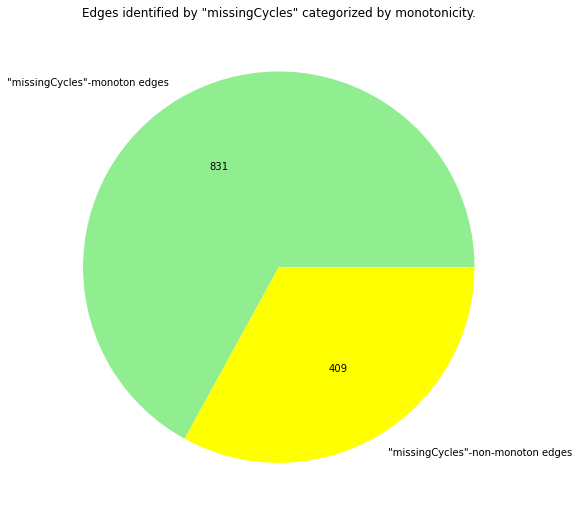

In [53]:
edges_list = ['A', 'B', 'C', 'D', 'E', 'F']
# just check for DAGs that use missingCycles: 
xmissing_edges_and_conseq = []
subdag_count_lst = [] # for checking how many of the non-identifiable edges are actually 'just' from different subdags of one DAG (or even the same subdag (but we ḱnow that is not possible, because each DAG has maximal one edge identified by "missingCycles")) 
indcs_nonmon_miscycles = []
for i in miscycles_idx:  # loop through all DAG indices that have a "missingCycles"-edge
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    xmissing_edges_and_conseq_local = []
    subdag_count = 0
    indcs_nonmon_local = []
    for j in range(len(nodes_diff_all[i])):  # loop through all subdags of dag
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        xmissing_edges_and_conseq_local_local = []
        for k in range(len(nodes_diff_all[i][j])):  # loop through the differences between all identified edges (A, B, C, D, E)
            if nodes_diff_all[i][j][k] == -1.0:  # if there is a difference, i.e. if edge is non-monoton
                ######
                jrex = False
                jloadrex = json.loads(monoton_data[i][0])
                if edges_list[k] in jloadrex['results']: 
                    jedgerex = jloadrex['results'][f'{edges_list[k]}']
                    if 'missingCycles' in jedgerex[0]: 
                        jrex = jedgerex[0]['missingCycles']

                ######
                
                if jrex:  # if non-monoton edge is "missingCycles"-edge
                    xmissing_edges_and_conseq_local_local.append([difference, edges_list[k]])  # append the deleted confounder of subdag and the non-monoton "missingCycles"-edge
                    indcs_nonmon_local.append([i,j+1])  # record indices
                    subdag_count += 1  # is actually sum over non-monoton "missingCycles"-edges per DAG
        xmissing_edges_and_conseq_local.append(xmissing_edges_and_conseq_local_local)
    indcs_nonmon_miscycles.append(indcs_nonmon_local)
    subdag_count_lst.append(subdag_count)    
    xmissing_edges_and_conseq.append(xmissing_edges_and_conseq_local)
    

# print(f'{subdag_count_lst = }')
# print(f'{len(xmissing_edges_and_conseq), xmissing_edges_and_conseq = }')
print('Confounder edges, when deleted, resulted in an edge previously identified by "missingCycles" to be non-identifiable: ')
flat_xmissing_eac = [ x for lst in xmissing_edges_and_conseq for sublst in lst for x in sublst]
print(f'{len(flat_xmissing_eac), flat_xmissing_eac = }\n')


print(f'For each DAG with a "missingCycles"-edge this edge is non-identifiable in maximal {np.max(subdag_count_lst)} subdag(s), \
there are {len(flat_xmissing_eac)} confounder edges, when deleted result in a non-monoton missingCycles edge \
and {np.sum(np.array(subdag_count_lst) != 0) = } of the edges identified by "missingCycles" are non-monoton. \n') 
# <-- remember that the subdag_count not only counts the number of subdags that have a non-monoton "missingCycles"-edge, but...
# ...is counting/adding (theoretically/in the code) also the number of different non-monoton "missingCycles"- edges. 

#### 

# print(f'{subdag_count_lst = }')
# print(f'{len(subdag_count_lst) = }')
# print(f'{len(miscycles_idx) = }')

# sdcl_not_one = np.where(np.array(subdag_count_lst)>1, 1, 0)
# print(f'{np.sum(sdcl_not_one) = }')
# print(f'{np.asarray(sdcl_not_one==1).nonzero() = }')

# np.asarray(condition).nonzero()

# xxx = np.array(subdag_count_lst) != 0
# print(f'{np.sum(xxx) = }')

####

sdcl_not_one = np.where(np.array(subdag_count_lst)>1, 1, 0)

print(f'''\nBecause each DAG has maximal one edge that is identified by "missingCycles" ({int(np.max(num_miscycles)) == 1 = }, see above), ...''')
print(f'It follows that {np.sum(sdcl_not_one)} times the "missingCycles" edge was multi-non-monoton, i.e. deleting different (here 2 or {np.max(subdag_count_lst)}) confounder edges led to non-monotonicity. ')

idx_local_mnm = np.asarray(sdcl_not_one==1).nonzero()[0]
idx_of_multi_non_monoton = miscycles_idx[idx_local_mnm]
dags_multi_non_monoton = np.array(dags)[idx_of_multi_non_monoton]
edges_multi_non_monoton = [ x for (i, x) in enumerate(xmissing_edges_and_conseq) if i in idx_local_mnm]

# print(f'These multi-non-monoton DAGs are: { dags_multi_non_monoton = }')
print(f'These multi-non-monoton edges are: { len(edges_multi_non_monoton), edges_multi_non_monoton = }')
####


print('\n##########################################################################################################################\n')

print(f'The non-monoton edges are: {[ x[1] for x in flat_xmissing_eac ]}')
print(f'Their non-monotonicity resulted from not being identifiable after deleting corresponding* confounder edges : \n{[ x[0] for x in flat_xmissing_eac ]}')
print('...from corresponding* DAGs: ')
flat_indcs_nonmon_miscycles = [ x for sublst in indcs_nonmon_miscycles for x in sublst]
# print(f'{len(flat_indcs_nonmon_miscycles), flat_indcs_nonmon_miscycles = }')
dags_indcs_nonmon_miscycles = [ x[0] for x in flat_indcs_nonmon_miscycles ]
dags_nonmon_miscycles = [ monoton_dags[x][0] for x in dags_indcs_nonmon_miscycles ]
print(f'{ dags_nonmon_miscycles }')
# print(f'{len(dags_nonmon_miscycles), dags_nonmon_miscycles = }')

print('\n*(the above 3 lists are linked by index, i.e. same index i in all 3 lists means that, non-monoton "missingCycles"-edge i resulted from deleting confounder edge i in DAG i)\n')

print('\n##########################################################################################################################\n')

print('\n')
# Example: 
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Example: \n')
sample = random.choice(flat_indcs_nonmon_miscycles)

print(f'{sample = }')

print('Example DAG that has non-monoton "missingCycle"-edge: ')
print(f'DAG: {monoton_dags[sample[0]][0] = }')
print(f'with DAGitty result: {monoton_data[sample[0]][0] = }\n')

print(f'with subdag: ({monoton_dags[sample[0]][sample[1]] = })')
print(f'and DAGitty result for subdag: {monoton_data[sample[0]][sample[1]] = } \n')

print(f'{nodes_diff_all[sample[0]] = }')

print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
# :end Example


print(f"\nAs already mentioned above, {np.sum(np.array(subdag_count_lst) != 0)} of the DAGs that use 'missingCycles' are non-monoton because** of a non-identifiable edge that was identified before by method 'missingCycle'.")
print('**(but might not be the only reason / there could be ofcourse another non-identifiable edge, that was identifiable before)\n')
print(f'Therefor only {np.sum(not_boole_monoton_and_miscycles) - np.sum(np.array(subdag_count_lst) != 0)} of the { np.sum(not_boole_monoton_and_miscycles) = } DAGs that use "missingCycles" and are non-monoton, have an edge that was identified by "missingCycles" that is monoton.')
print(f'In total {np.sum(boole_miscycles) - np.sum(np.array(subdag_count_lst) != 0)} of the {int(sum_num_missingCycles)} DAGs that use "missingCycles" have an "missingCycles"-monoton edge.')

# # test: 
# print(f'{sum_num_missingCycles == np.sum(boole_miscycles) = }')


# plot: 

figy2 = plt.figure(figsize=(9, 9))
ax1= figy2.add_subplot()

labels = '"missingCycles"-monoton edges', '"missingCycles"-non-monoton edges'
sizes = [np.sum(boole_miscycles) - np.sum(np.array(subdag_count_lst) != 0), np.sum(np.array(subdag_count_lst) != 0)]

ax1.pie(sizes, labels=labels, colors=[ 'lightgreen', 'yellow'], autopct= lambda x: round(x*np.sum(boole_miscycles)/100))
ax1.set_title('Edges identified by "missingCycles" categorized by monotonicity.')
plt.show()



(above: The difference between this chart and the one before is that here we look at non-monotonictiy of 'missingCycles'-edges, while in the first chart we look at DAGs that are not monoton (which can happen ofcourse also if another edge (instead of the 'missingCycles'-edge) is not monoton).)

### more about "missingCycles"-edges: 
##### *A "missingCycles"-edge is non-monoton $ \nRightarrow $ there is a deleted confounder edge of the form $ A \leftrightarrow X $ with $ X $ on the cycle* and
##### *A "missingCycles"-edge is non-monoton $ \nRightarrow $ there is a deleted confounder edge of the form $ Y \leftrightarrow X $ with $ X $ on the cycle and $ Y $ arbitrary*, but
##### *A "missingCycles"-edge is non-monoton $ \Rightarrow $ there is a deleted confounder edge of the form $ Y \leftrightarrow X $ with $ X $ on the cycle or $ Y $ on the cycle*

In [54]:
edges_list = ['A', 'B', 'C', 'D', 'E', 'F']
# just check for DAGs that use missingCycles: 
missingcycles_and_conseq = []
subdag_count_lst = [] # for checking how many of the non-identifiable edges are actually 'just' from different subdags of one DAG (or even the same subdag (but we ḱnow that is not possible, because each DAG has maximal one edge identified by "missingCycles")) 
indcs_nonmon_miscycles = []
for i in miscycles_idx:  # loop through all DAG indices that have a "missingCycles"-edge
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    missingcycles_and_conseq_local = []
    subdag_count = 0
    indcs_nonmon_local = []
    for j in range(len(nodes_diff_all[i])):  # loop through all subdags of dag
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        missingcycles_and_conseq_local_local = []
        for k in range(len(nodes_diff_all[i][j])):  # loop through the differences between all identified edges (A, B, C, D, E, F)
            # cycle = []  # not needed 
            ######
            jrex = False
            jloadrex = json.loads(monoton_data[i][0])
            if edges_list[k] in jloadrex['results']: 
                jedgerex = jloadrex['results'][f'{edges_list[k]}']
                if 'missingCycles' in jedgerex[0]: 
                    jrex = jedgerex[0]['missingCycles']
            if jrex:  # if edge is "missingCycles"-edge, jrex is already the cycle: 
                cycle = jrex
            ######
                missingcycles_and_conseq_local_local.append([[i, j+1], difference, edges_list[k], cycle, nodes_diff_all[i][j][k]])  # and append the deleted confounder, cycle and monotonicity-status
                indcs_nonmon_local.append([i,j+1])
                subdag_count += 1 
                
        missingcycles_and_conseq_local.append(missingcycles_and_conseq_local_local)
    indcs_nonmon_miscycles.append(indcs_nonmon_local)
    subdag_count_lst.append(subdag_count)    
    missingcycles_and_conseq.append(missingcycles_and_conseq_local)

# print(f'{len(missingcycles_and_conseq), missingcycles_and_conseq = }')
# print(f'{len(subdag_count_lst), subdag_count_lst = }')

print('\nThe following lists all non-monoton "missingCycles"-edges in the following form: [index, deleted confounder edge, non-monoton "missingCycles-edge", cycles, -1.0]: ')
nonmon_missingcycles_and_conseq = [ x for lst in missingcycles_and_conseq for sublst in lst for x in sublst if x[4]==-1.0]
# print(f'{nonmon_missingcycles_and_conseq}\n')
print(f'{len(nonmon_missingcycles_and_conseq), nonmon_missingcycles_and_conseq = }') 

# check if for all non-monoton "missingCycles"-edges the deleted confounder was of the form A<->X with X in the cycle of the "missingCycle": 
tof = np.zeros(len(nonmon_missingcycles_and_conseq), dtype=bool)
fail1 = []
for i, x in enumerate(nonmon_missingcycles_and_conseq): 
    # np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3][0])) ] )) checks for Y<->X as confounder, if X appears in any of the missingCycles-Cycles 
    if x[1][0][0]=='A' and (np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3])) ] ))): 
        # print(f'{x[3] = }')
        tof[i]=True  
    else: fail1.append([i, x])

print(f'{ len(tof), np.all(tof) = }')
print(f'{ fail1 = }')

print(f'\nAs can be seen above not all deleted confounders that lead to non-monotonicity of a missingCycle have the form A<->X with X on the missingCycle, for example because it has the form C<->X with X on the missing Cycle. \n')

# check if for all non-monoton "missingCycles"-edges the deleted confounder was of the form Y<->X with X in the cycle of the "missingCycle": 
tof = np.zeros(len(nonmon_missingcycles_and_conseq), dtype=bool)
fail2 = []
for i, x in enumerate(nonmon_missingcycles_and_conseq): 
    # np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3][0])) ] )) checks for Y<->X as confounder, if X appears in any of the missingCycles-Cycles 
    if (np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3])) ] ))): tof[i]=True  
    else: fail2.append([i, x])

print(f'{ len(tof), np.all(tof) = }')
print(f'{ fail2 = }')

print(f'\nAlso not all deleted confounders that lead to non-monotonicity of a missingCycle have the form Y<->X with X on the missingCycle and Y arbitrary, but... \n')

# check if for all non-monoton "missingCycles"-edges the deleted confounder was of the form Y<->X with X or Y in the cycle of the "missingCycle": 
tof = np.zeros(len(nonmon_missingcycles_and_conseq), dtype=bool)
fail3 = []
for i, x in enumerate(nonmon_missingcycles_and_conseq): 
    # np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3][0])) ] )) checks for Y<->X as confounder, if X appears in any of the missingCycles-Cycles 
    if (np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3])) ] ))) or (np.any(np.array( [ x[1][0][0] in x[3][i] for i in range(len(x[3])) ] ))): tof[i]=True  
    else: fail3.append([i, x])

print(f'{ len(tof), np.all(tof) = }')
print(f'{ fail3 = }')

print(f'\nAll deleted confounders that lead to non-monotonicity of a missingCycle have the form Y<->X with X on the missingCycle or Y on the missingCycle-Cycle. \n')



The following lists all non-monoton "missingCycles"-edges in the following form: [index, deleted confounder edge, non-monoton "missingCycles-edge", cycles, -1.0]: 
len(nonmon_missingcycles_and_conseq), nonmon_missingcycles_and_conseq = (420, [[[7, 3], ['A<->D'], 'B', [['B', 'C', 'D', 'B']], -1.0], [[47, 4], ['A<->E'], 'B', [['B', 'D', 'E', 'B']], -1.0], [[79, 4], ['A<->E'], 'C', [['C', 'D', 'E', 'C']], -1.0], [[111, 4], ['A<->E'], 'C', [['C', 'D', 'E', 'C']], -1.0], [[527, 4], ['A<->E'], 'B', [['B', 'C', 'E', 'B'], ['B', 'D', 'E', 'B']], -1.0], [[559, 4], ['A<->E'], 'B', [['B', 'D', 'E', 'B']], -1.0], [[591, 4], ['A<->E'], 'B', [['B', 'C', 'E', 'B']], -1.0], [[639, 5], ['A<->F'], 'B', [['B', 'E', 'F', 'B']], -1.0], [[703, 5], ['A<->F'], 'C', [['C', 'E', 'F', 'C']], -1.0], [[735, 5], ['A<->F'], 'C', [['C', 'E', 'F', 'C']], -1.0], [[767, 5], ['A<->F'], 'C', [['C', 'E', 'F', 'C']], -1.0], [[1151, 5], ['A<->F'], 'C', [['C', 'D', 'F', 'C']], -1.0], [[1167, 3], ['A<->D'], 'B', [['B', 'C', '

*There is a deleted confounder edge of the form $ A \leftrightarrow X $ with $ X $ on the cycle $ \nRightarrow $ the "missingCycles"-edge is non-monoton:*

In [55]:
# check if for all "missingCycles"-edges, if the deleted confounder was of the form A<->X with X in the cycle of the "missingCycle" then the edge is non-monoton: 
flat_missingcycles_and_conseq = [ x for lst in missingcycles_and_conseq for sublst in lst for x in sublst]
tof_all = np.zeros(len(flat_missingcycles_and_conseq), dtype=bool)
for i, x in enumerate(flat_missingcycles_and_conseq): 
        if x[1][0][0]=='A' and (np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3])) ] ))) and x[4]!=-1.0: tof_all[i]=True

print(f'{ len(tof_all), np.all(tof_all), np.any(tof_all) = }')

print(f'Also, for all "missingCycles"-edges, if the deleted confounder was of the form A<->X with X in the cycle of the "missingCycle" then the edge is non-monoton: {np.all(tof_all)}')

# example of second statement: 

dag_indcs_nonmon_miscycles = [ x[0][0] for x in nonmon_missingcycles_and_conseq ]
# print(f'{len(dag_indcs_nonmon_miscycles), dag_indcs_nonmon_miscycles = }')


indxs_of_nononmon_missingcycles_and_conseq = [ i for i, x in enumerate(missingcycles_and_conseq) if x[0][0][0][0] not in dag_indcs_nonmon_miscycles ]
# print(f'{len(indxs_of_nononmon_missingcycles_and_conseq), indxs_of_nononmon_missingcycles_and_conseq = }') 

monoton_xample = np.random.choice(indxs_of_nononmon_missingcycles_and_conseq)
print(f'{monoton_xample = }')

print('Example of monoton "missingCycles"-edge with a A<->X as deleted confounder and X on the cycle: ')
print(f'{missingcycles_and_conseq[monoton_xample] = }') 


 len(tof_all), np.all(tof_all), np.any(tof_all) = (10996, False, True)
Also, for all "missingCycles"-edges, if the deleted confounder was of the form A<->X with X in the cycle of the "missingCycle" then the edge is non-monoton: False
monoton_xample = 864
Example of monoton "missingCycles"-edge with a A<->X as deleted confounder and X on the cycle: 
missingcycles_and_conseq[monoton_xample] = [[[[22687, 1], ['A<->B'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'F', 'B']], 0.0]], [[[22687, 2], ['A<->C'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'F', 'B']], 0.0]], [[[22687, 3], ['A<->D'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'F', 'B']], 0.0]], [[[22687, 4], ['A<->E'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'F', 'B']], 0.0]], [[[22687, 5], ['A<->F'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'F', 'B']], 0.0]], [[[22687, 6], ['B<->E'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'F', 'B']], 0.0]], [[[22687, 7], ['C<->F'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'F', 'B']], 0.0]], [[[22687, 8], ['D<->E'],

#### Extending the above result (missingCycles-edge non-monoton $ \Rightarrow \exists $ deleted $(X \leftrightarrow Y) $ with $ X $ or $ Y $ on the Cycle) for edges that are part of the cycle of the "missingCycles"-edge: 

Let a quasi-"missingCycles"-edge be an edge that is part of the cycle used to identify a "missingCycles"-edge, then the results above for "missingCycles"-edges can be extended to quasi-"missingCycles"-edges: 

*A quasi-"missingCycles"-edge is locally non-monoton (and therefor globally) $ \Rightarrow $ the deleted confounder edge was  of the form $ Y \leftrightarrow X $ with $ X $ or $ Y $ on the cycle.* 


(Checking the following: For a non-monoton edge that appears in the _cycle_ of a 'missingCycles'-edge, is it true that the deleted confounder that made this edge non-monoton is of the form $ Y \leftrightarrow X $ with $ X $ or $ Y $ on the _cycle_?)

In [56]:
edges_list = ['A', 'B', 'C', 'D', 'E', 'F']
# just check for DAGs that use missingCycles: 
missingcycles_and_conseq = []
subdag_count_lst = [] # for checking how many of the non-identifiable edges are actually 'just' from different subdags of one DAG (or even the same subdag (but we ḱnow that is not possible, because each DAG has maximal one edge identified by "missingCycles")) 
indcs_nonmon_miscycles = []
for i in miscycles_idx: 
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    missingcycles_and_conseq_local = []
    subdag_count = 0
    indcs_nonmon_local = []
    for j in range(len(nodes_diff_all[i])): 
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        missingcycles_and_conseq_local_local = []
        for k in range(len(nodes_diff_all[i][j])): 
            cycle = []
            ######
            jrex = False
            jloadrex = json.loads(monoton_data[i][0])
            if edges_list[k] in jloadrex['results']: 
                jedgerex = jloadrex['results'][f'{edges_list[k]}']
                if 'missingCycles' in jedgerex[0]: 
                    jrex = jedgerex[0]['missingCycles']
            if jrex:  # if edge is "missingCycles"-edge, jrex is already the cycle: 
                cycle = jrex
            ######
                missingcycles_and_conseq_local_local.append([[i, j+1], difference, edges_list[k], cycle, nodes_diff_all[i][j]])  # <--- difference to above is here, all differences are stored! 
                indcs_nonmon_local.append([i,j+1])
                subdag_count += 1
        missingcycles_and_conseq_local.append(missingcycles_and_conseq_local_local)
    indcs_nonmon_miscycles.append(indcs_nonmon_local)
    subdag_count_lst.append(subdag_count)    
    missingcycles_and_conseq.append(missingcycles_and_conseq_local)

# print(f'{len(missingcycles_and_conseq), missingcycles_and_conseq = }')


# check for quasi-"missingCycles"-edges: 

# flatten the recorded structure to ignore the DAG-grouping: 
flat_missingcycles_and_conseq = [ x for lst in missingcycles_and_conseq for sublst in lst for x in sublst]
# print(f'{len(flat_missingcycles_and_conseq), flat_missingcycles_and_conseq = }')

cycle_truth = []
for i, x in enumerate(flat_missingcycles_and_conseq):  # loop through all subdags of DAGs that have a "missingCycles"-edge
    cycle_truth_edges = []
    for j, edge in enumerate(['A', 'B', 'C', 'D', 'E', 'F']):  # loop through all possible edges
        cycle_truth_vec = []
        for k, cycle in enumerate(x[3]):  # loop through all cycles
            if (edge in cycle) and x[4][j]==-1.0:  # check if edge is in cycle, i.e. if edge is a quasi-"missingCycles"-edge, and if edge is non-monoton #<--- !! especially the missingCycles edge does not need to be non-monoton!!
                if (np.any(np.array( [ x[1][0][4] in x[3][i] for i in range(len(x[3])) ] ))) or (np.any(np.array( [ x[1][0][0] in x[3][i] for i in range(len(x[3])) ] ))): cycle_truth_vec.append(True)  # if deleted confounder has form A<->X with X in cycle: append TRUE
                else: cycle_truth_vec.append(False)  # else append FALSE
        cycle_truth_edges.append(np.all(cycle_truth_vec))
    cycle_truth.append(cycle_truth_edges)
    
    

# print(f'{np.all(cycle_truth), len(cycle_truth), cycle_truth = }')
print(f'Check if for all locally (and therefor globally) non-monoton quasi-"missingCycles"-edges the deleted confounder has the form Y<->X with X or Y on the cycle: {np.all(cycle_truth)}')
# print(f'{np.all(cycle_truth), len(cycle_truth) = }') # check if all entries are TRUE

# # monoton_xample see above
# print(f'\nExample for the second statement ({monoton_xample = }): \n{missingcycles_and_conseq[monoton_xample]= }')  # <-- did actually not check, that this (using monoton_xample from above) always works here, but worked for the examples I checked..


Check if for all locally (and therefor globally) non-monoton quasi-"missingCycles"-edges the deleted confounder has the form Y<->X with X or Y on the cycle: True


### DAGs for which all edges are identifiable are monoton? (Monotonie)
$ \rightarrow NO $

In [57]:

five_edges_idfied = np.where(boole_five>0)[0]
monon_indx_vec = np.where(monon_boolean==True)[0]


alledges_and_monoton_Q = [ x in monon_indx_vec for x in five_edges_idfied]

# print(f'{np.sum(alledges_and_monoton_Q) = }')
print(f'All DAGs for which all edges are identified are monoton: {len(alledges_and_monoton_Q) == np.sum(alledges_and_monoton_Q)}')
print(f'Only {np.sum(alledges_and_monoton_Q)} of the {np.sum(boole_five)} DAGs with 5 identified edges are also monoton.')



All DAGs for which all edges are identified are monoton: False
Only 13981 of the 21755 DAGs with 5 identified edges are also monoton.


### DAGs which have 5 identified edges but are not monoton: 

In [58]:
# # check boole_five and monon_boolean arrays: 
# print(f'{max(boole_five), len(boole_five), np.sum(boole_five) = }')
# print(f'{max(monon_boolean), len(monon_boolean), int(np.sum(monon_boolean)) = }\n')

boole_five_int = np.array(boole_five, dtype=int)
monon_boolean_int = np.array(monon_boolean, dtype=int)

print(f'Number of DAGs with 5 identifiable edges: {np.sum(boole_five_int)}')
print(f'Number of DAGs that are monoton: {np.sum(monon_boolean_int)}\n')


dags_5_notmonon = np.subtract(boole_five_int, np.multiply(boole_five_int, monon_boolean_int))
# print(f'{int(np.sum(dags_5_notmonon)) = }') 
five_edges_not_monoton = int(np.sum(dags_5_notmonon))
print(f'And {five_edges_not_monoton} DAGs for which 5 edges are identifiable but which are not monoton.\n') 

dags_5_notmonon_indx = np.where(dags_5_notmonon==1)[0]
# print(f'{len(dags_5_notmonon_indx), dags_5_notmonon_indx = }')
print('For example: ')
chooz = np.random.choice(dags_5_notmonon_indx)
print(f'{chooz, boole_five[chooz], monon_boolean[chooz] = }')
print(f'{dags[chooz] = }')
# print(f'{monoton_data[chooz] = }')




Number of DAGs with 5 identifiable edges: 21755
Number of DAGs that are monoton: 23215

And 7774 DAGs for which 5 edges are identifiable but which are not monoton.

For example: 
chooz, boole_five[chooz], monon_boolean[chooz] = (25582, True, False)
dags[chooz] = 'dag { A->B->C->D->E->F E<->F D<->F C<->D B<->F B<->E B<->D B<->C A<->E A<->D A<->C }'


### DAGs which are monoton also have 5 identifiable edges? (Monotonie)
$ \rightarrow NO $   (already because $ |\{ \text{ABCDEF DAGs which are monoton} \}| = 23215 > 21755 = |\{ \text{ABCDEF DAGs for which all edges are identifiable} \}|) $

In [59]:
five_edges_idfied = np.where(boole_five>0)[0]
monon_indx_vec = np.where(monon_boolean==True)[0]
all_monoton = np.sum(monon_boolean_int)

monoton_and_alledges_Q = [ x in five_edges_idfied for x in monon_indx_vec]

monoton_and_alledges = np.sum(monoton_and_alledges_Q)
print(f'All DAGs which are monoton have also five identifiable edges: {len(monoton_and_alledges_Q) == monoton_and_alledges}')
print(f'Only {monoton_and_alledges} of the {all_monoton} monoton DAGs also have 5 identifiable edges.\n')


only_monton = np.sum(np.subtract(monon_boolean_int, np.multiply(monon_boolean_int, boole_five_int)))
print(f'Therefor {only_monton} of the {all_monoton} monoton DAGs do not have five identifiable edges. ')

All DAGs which are monoton have also five identifiable edges: False
Only 13981 of the 23215 monoton DAGs also have 5 identifiable edges.

Therefor 9234 of the 23215 monoton DAGs do not have five identifiable edges. 


### neither monoton nor 5 edges identifiable: 

In [60]:
not_boole_five_int = np.subtract(np.ones_like(boole_five_int), boole_five_int)
# print(f'{len(not_boole_five_int), np.sum(not_boole_five_int) = }')
print(f'Number of DAGs for which NOT all edges can be identified: {np.sum(not_boole_five_int)}')

not_monon_int = np.subtract(np.ones_like(monon_boolean_int), monon_boolean_int)
# print(f'{len(not_monon_int), np.sum(not_monon_int) = }')
print(f'Number of DAGs which are NOT monoton:{np.sum(not_monon_int)}')

not_monon_not_fiveedges_vec = np.multiply(not_boole_five_int, not_monon_int)
sum_not_monon_not_fiveedges = np.sum(not_monon_not_fiveedges_vec)
# print(f'{len(not_monon_not_fiveedges_vec), sum_not_monon_not_fiveedges = }')
print(f'\nNumber of DAGs for which NOT all edges are identifiable AND which are NOT monoton: {sum_not_monon_not_fiveedges}')


Number of DAGs for which NOT all edges can be identified: 11013
Number of DAGs which are NOT monoton:9553

Number of DAGs for which NOT all edges are identifiable AND which are NOT monoton: 1779


### display results: (Monotonie and five-edges-identifiability)

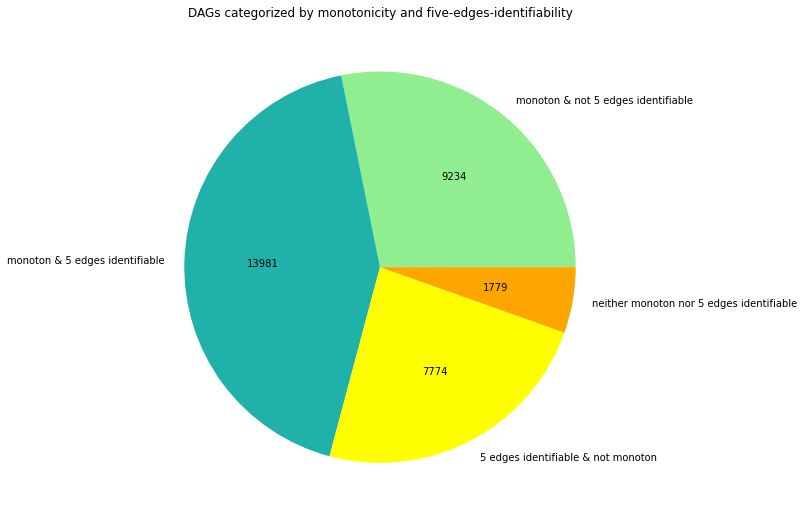

In [61]:
fig4 = plt.figure(figsize=(9, 9))
ax4 = fig4.add_subplot()

labels = 'monoton & not 5 edges identifiable', 'monoton & 5 edges identifiable', '5 edges identifiable & not monoton', 'neither monoton nor 5 edges identifiable'
sizes = [only_monton, monoton_and_alledges, five_edges_not_monoton, sum_not_monon_not_fiveedges]
# print(f'{only_monton + monoton_and_alledges + five_edges_not_monoton + sum_not_monon_not_fiveedges = }')

ax4.pie(sizes, labels=labels, colors=[ 'lightgreen', 'lightseagreen', 'yellow', 'orange'], autopct= lambda x: round(x*len(dags)/100))
ax4.set_title('DAGs categorized by monotonicity and five-edges-identifiability')
plt.show()

### Deleting of which confounder edges leads to non-identification of edge for DAGs for which all edges are identifiable? 

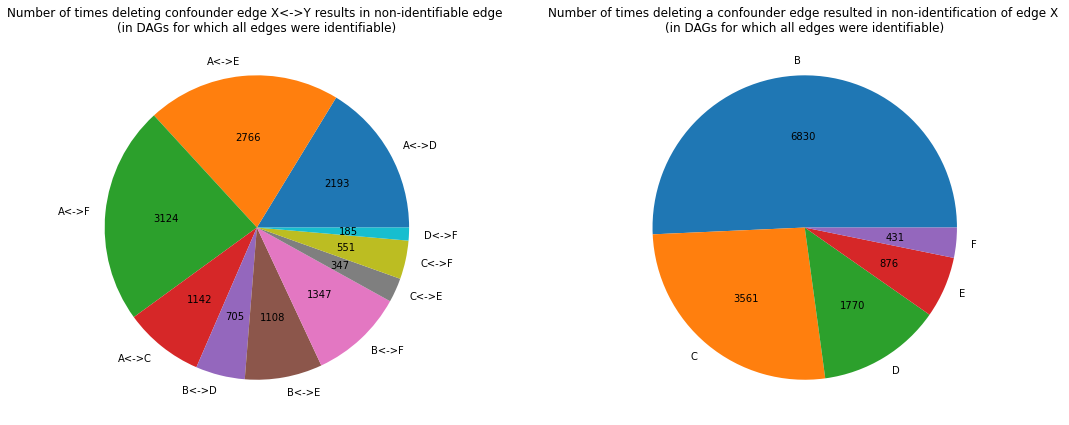

In [62]:
# get the confouder edges that lead to non-monotonicity and the corresponding edge that fails to be identified after removing the confounder: 
missing_edges_and_conseq = []
record = []
edges_list = ['A', 'B', 'C', 'D', 'E', 'F']
for i in range(len(nodes_diff_all)): 
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    missing_edges_and_conseq_local = []
    record_local = []
    for j in range(len(nodes_diff_all[i])): 
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        missing_edges_and_conseq_local_local = []
        record_local_local = []
        # just check for DAGs for which all 5 edges are identifiable, but which are not monoton: 
        if i in dags_5_notmonon_indx: 
            for k in range(len(nodes_diff_all[i][j])): 
                if nodes_diff_all[i][j][k] == -1.0: 
                    missing_edges_and_conseq_local_local.append([difference, edges_list[k]])
                    record_local_local.append([i, j+1, k])
        missing_edges_and_conseq_local.append(missing_edges_and_conseq_local_local)
        record_local.append(record_local_local)
    missing_edges_and_conseq.append(missing_edges_and_conseq_local)
    record.append(record_local)



# print(f'{len(missing_edges_and_conseq), missing_edges_and_conseq = }')

flat_missing_edges_and_conseq = [ x for sublist in missing_edges_and_conseq for subsublist in sublist for x in subsublist ] 
# print(f'{len(flat_missing_edges_and_conseq), flat_missing_edges_and_conseq = }')

# get all the confouder edges: 
nonmon_maker_edges = [ x[0][0] for x in flat_missing_edges_and_conseq ]
# print(f'{len(nonmon_maker_edges), nonmon_maker_edges = }')
# print(f'\n{flat_missing_edges_and_conseq[5] = }\n')

counts_nonmon_maker = Counter(nonmon_maker_edges)
# print(f'{len(counts_nonmon_maker), counts_nonmon_maker = }')

# get all the non-identifiable edges: 
missing_edges = [ x[1] for x in flat_missing_edges_and_conseq ]
# print(f'{len(missing_edges), missing_edges = }')
counts_edges = Counter(missing_edges)
# print(f'{counts_edges = }')

# Plot edges that lead to non-monotonicity & the edges that were failed to identifiy: 
fig5 = plt.figure(figsize=(18, 7))
ax5 = fig5.add_subplot(1,2,1)

labels = []
sizes = []
for x, y in counts_nonmon_maker.items():
    labels.append(x)
    sizes.append(y)

ax5.pie(sizes, labels=labels,  autopct= lambda x: round(x*(len(nonmon_maker_edges))/100))
ax5.set_title('Number of times deleting confounder edge X<->Y results in non-identifiable edge \n(in DAGs for which all edges were identifiable)')

ax6 = fig5.add_subplot(1,2,2)

labels = []
sizes = []
for x, y in counts_edges.items():
    labels.append(x)
    sizes.append(y)

ax6.pie(sizes, labels=labels,  autopct= lambda x: round(x*(len(missing_edges))/100))
ax6.set_title('Number of times deleting a confounder edge resulted in non-identification of edge X \n(in DAGs for which all edges were identifiable)')
plt.show()



#### check above data: 

In [63]:
# print(f'{len(record), record = }')

record_sqe = [x for lst in record for sublist in lst for x in sublist ]
# print(f'{len(record_sqe), record_sqe = }')

choose = np.random.choice(range(len(record_sqe)))
test = record_sqe[choose]
print(f'{test = }')

# print(f'{missing_edges_and_conseq[test[0]] = }')
print(f'{missing_edges_and_conseq[test[0]][test[1]-1] = }')

print(f'\n{monoton_dags[test[0]][0] = }')
print(f'{monoton_data[test[0]][0] = } \n')

print(f'{monoton_dags[test[0]][test[1]] = } ')
print(f'{monoton_data[test[0]][test[1]] = } \n') 

## NOTICE in Output that the order of DAG NOTATION seems to be differentn in 'monoton_dags' for the subdags, than in 'dags' therefor: # <--- ! dependent on NOTATION of DAGs !


test = [5429, 2, 1]
missing_edges_and_conseq[test[0]][test[1]-1] = [[['A<->D'], 'B']]

monoton_dags[test[0]][0] = 'dag { A->B->C->D->E->F D<->E C<->E B<->F B<->C A<->F A<->D A<->B }'
monoton_data[test[0]][0] = '{"results":{"B":[{"fastp":[[[[-1,2,1,8,1,13,1],[1,2,1,9,1,12,1]],null,[[-1,2,1,3,1,13,1],[1,2,1,4,1,12,1],[-1,3,1,4,1,8,1],[1,3,2,9,1]],null,null]],"propagate":"D","propagatePath":["C","D"],"propagatedMissingCycles":[],"oldMissingCycles":[]}],"C":[{"fastp":[[[[1,3,1]],null,[[1,2,1]],null,null]],"instrument":"A"}],"D":[{"fastp":[[[[-1,2,1,13,1],[1,3,1,9,1]],null,[[-1,2,1,12,1],[1,3,1,8,1]],null,null]],"propagate":"C","propagatePath":["C"],"propagatedMissingCycles":[],"oldMissingCycles":[]}],"E":[{"fastp":[[[[1,5,1]],null,[[1,4,1]],null,null]],"instrument":"A"}],"F":[{"fastp":[[[[-1,2,1,3,1,9,1,13,1,20,1],[1,2,1,3,1,10,1,13,1,18,1],[1,2,1,4,1,8,1,13,1,20,1],[-1,2,1,4,1,10,1,12,1,18,1],[-1,2,1,5,1,8,1,13,1,18,1],[1,2,1,5,1,9,1,12,1,18,1],[-1,3,1,4,1,8,1,9,1,20,1],[1,3,1,4,1,8,1,10,

### Deleting of which confounder edges leads to non-monotonicity of DAGs for which all edges are identifiable? 

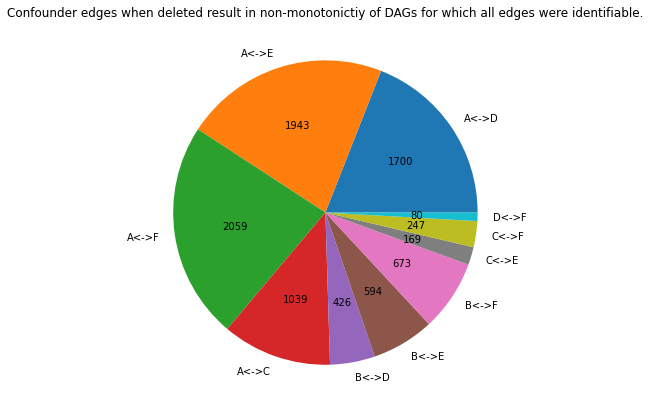

In [64]:
# !! ---> difference to above is that here only the confounders are recorded once, if they lead to non-monotonicty <---- !!
# !! i.e. the numbers for each recorded confounder should therefor be smaller or equal to the counts above !!

# get the confouder edges that lead to non-monotonicity after removing the confounder: 
# just check for DAGs for which all 5 edges are identifiable, but which are not monoton: 
nonmon_confouders = []
for i in dags_5_notmonon_indx: 
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    nonmon_confouders_local = []
    for j in range(len(nodes_diff_all[i])): 
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        for k in range(len(nodes_diff_all[i][j])): 
            if nodes_diff_all[i][j][k] == -1.0: 
                nonmon_confouders_local.append(difference)
                break
        
    nonmon_confouders.append(nonmon_confouders_local)
    
# print(f'{len(nonmon_confouders), nonmon_confouders = }')

flat_nonmon_confouders = [ x for sublist in nonmon_confouders for subsublist in sublist for x in subsublist ] 
# print(f'{len(flat_nonmon_confouders), flat_nonmon_confouders = }')

# # check that each non-monoton dag was covered: 
# print(f'{len(nonmon_confouders), len(dags_5_notmonon_indx) = }')

counts = Counter(flat_nonmon_confouders)
# print(counts)


# Plot: 
fig7 = plt.figure(figsize=(7, 7))
ax7 = fig7.add_subplot()

labels = []
sizes = []
for x, y in counts.items():
    labels.append(x)
    sizes.append(y)

ax7.pie(sizes, labels=labels,  autopct= lambda x: round(x*(len(flat_nonmon_confouders))/100))
ax7.set_title('Confounder edges when deleted result in non-monotonictiy of DAGs for which all edges were identifiable.')
plt.show()


### In which DAGs there was more than one way to identify an edge? 

In [65]:
jlizt = []
for date in data: 
    jdate = json.loads(date)
    jlx = []
    for key in jdate['results']: 
        jlx.append(jdate['results'][key][0]['fastp'])
    jlizt.append(jlx)


jmount_lzt = [[len(x) for x in y] for y in jlizt]
# print(f'{len(jmount_lzt), jmount_lzt = }')

### sanity checks / check that datasets are as expected:

In [66]:
print(f'{len(dags) = }')
print(f'{len(monoton_dags) = }')

eq_dags_Q = np.zeros(len(dags))
for i, dag in enumerate(dags): 
    eq_dags_Q[i] = np.all(dag == monoton_dags[i][0])
    
print(f'Check if dags and monoton_dags have the same order: {len(eq_dags_Q) == np.sum(eq_dags_Q) = }')

# same for data and monon_data: 

print(f'{len(data) = }')
print(f'{len(monoton_data) = }')

eq_data_Q = np.zeros(len(data))
for i, dat in enumerate(data): 
    eq_data_Q[i] = np.all(dat == monoton_data[i][0])
    
print(f'Check if data and monoton_data have the same order: {len(eq_data_Q) == np.sum(eq_data_Q) = }')

len(dags) = 32768
len(monoton_dags) = 32768
Check if dags and monoton_dags have the same order: len(eq_dags_Q) == np.sum(eq_dags_Q) = True
len(data) = 32768
len(monoton_data) = 32768
Check if data and monoton_data have the same order: len(eq_data_Q) == np.sum(eq_data_Q) = True
